In [123]:
import sksurv as sks
import sksurv.preprocessing
import sksurv.metrics
import sksurv.datasets
import sksurv.linear_model

from pathlib import Path
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import pandas as pd
import importlib
import numpy as np
import sklearn as skl
import scipy.stats as sp
plt.ioff()

In [713]:
importlib.reload(np.random)

<module 'numpy.random' from '/home/twj8/.local/lib/python3.10/site-packages/numpy/random/__init__.py'>

In [4]:
# del np.random.seed
np.random.seed(99)

In [101]:
# #simple bernoulli time
# t = np.repeat([0,1,2],50)
# goof = sp.norm.rvs(0,1, size=100)

# # p_train = np.repeat([.9, .2], 50)

# # p true
# p = 0.9 - t*0.7

# # y
# y_train = sp.bernoulli.rvs(p)
# print(y_train.shape)
# print(t.shape)

# x_train = pd.DataFrame({"t":t,"goof":goof})
# x_train
# y_train


In [95]:
# # t_s = np.unique(x_train["t"]).shape[0]
# x_train["t2"] = np.where(x_train["t"] == 0, "a", "b")
# t_idx, t_code = pd.factorize(x_train["t2"])
# x_train["t3"] = t_idx
# # t_code
# # t_code
# t_s = len(t_code)
# t_idx

In [96]:
# with pm.Model() as bart:
#     # x_data = pm.MutableData("x", x_train)
#     # y_data = pm.MutableData("y", delta1)
    
#     # f = pmb.BART("f", X = x_data, Y = zdelt, m=50)
#     f = pmb.BART("f", X = x_train[["t3", "goof"]], Y = y_train, m=20, shape=t_s)
#     # z = pm.Deterministic("z", )

#     mu = pm.Deterministic("mu", pm.math.invprobit(f))
#     # y_pred = pm.Binomial("y_pred", p = mu, observed = delta2)
    
#     y_pred = pm.Bernoulli("y_pred", p=(mu[t_idx]), observed=y_train)
#     # y_pred = pm.Bernoulli("y_pred", p=(mu), observed=y_train, shape=x_data.shape[0])
#     smp4 = pm.sample(random_seed=2, draws=100, compute_convergence_checks=False)

In [97]:
# smp4

In [ ]:
# coords = {"t":[0,1]}
# with pm.Model(coords = coords) as bart:
#     # x_data = pm.MutableData("x", x_train)
#     # y_data = pm.MutableData("y", delta1)
    
#     # f = pmb.BART("f", X = x_data, Y = zdelt, m=50)
#     f = pmb.BART("f", X = x_train[["t", "goof"]], Y = y_train, m=20, shape=t_s)
#     # z = pm.Deterministic("z", )

#     mu = pm.Deterministic("mu", pm.math.invprobit(f))
#     # y_pred = pm.Binomial("y_pred", p = mu, observed = delta2)
    
#     y_pred = pm.Bernoulli("y_pred", p=(mu[t_idx]), observed=y_train)
#     # y_pred = pm.Bernoulli("y_pred", p=(mu), observed=y_train, shape=x_data.shape[0])
#     smp4 = pm.sample(random_seed=2, draws=100, compute_convergence_checks=False)

In [98]:
# bmi = pd.read_csv(pm.get_data("bmi.csv"))
# bmi

,age,bmi
0,0.03,13.235289
1,0.04,12.438775
2,0.04,14.541775
3,0.04,11.773954
4,0.04,15.325614
...,...,...
7289,21.45,19.329493
7290,21.47,21.562722
7291,21.54,23.355726
7292,21.68,24.869006


In [103]:
# y = bmi.bmi.values
# X = bmi.age.values[:, None]


# y_stack = np.stack([bmi.bmi.values] * 3)
# quantiles = np.array([[0.1, 0.5, 0.9]]).T
# quantiles
# print(y.shape)
# print(X.shape)
# print(y_stack.shape)
# print(quantiles.shape)


In [102]:
# X = np.linspace(0, 1, 120)[:,None]
# Y = np.repeat([0, 1, 2], 40)
# plt.plot(X[:,0], Y, ".")

In [104]:
# X.shape
# Y

In [105]:
# with pm.Model() as bart_model:
#     μ = pmb.BART("μ", X=X, Y=Y, m=50, shape=(3, 120))
#     θ = pm.Deterministic('θ', pm.math.softmax(μ, axis=0))
#     y = pm.Categorical("y", p=θ.T, observed=Y)
#     idata = pm.sample()

In [106]:
# idata

In [107]:
# posterior_mean = az.extract(idata, var_names='θ').mean("sample")
# posterior_mean[:,0:10]
# # idata.posterior["θ"][0][0].values[:,60:70]

In [108]:
# draws = smp4.posterior["mu"].values.reshape(4000, 100)
# m_draws = np.mean(draws, axis=0)

# print(np.mean(m_draws[0:50]))
# print(np.mean(m_draws[50:100]))




In [146]:
# PH: 𝛼 = 2.0, 𝜆 = exp{3 + 0.1(x1 + x2 + x3 + x4 + x5 + x6) + x7}
#S(t|𝛼, 𝜆) = e ^−(t∕𝜆)𝛼
def sim_surv(N=100, 
            T=100, 
            x_vars = 1, 
            lambda_f=None, 
            a=2, 
            alpha_f = None, 
            seed=999, 
            cens_ind = True,
            cens_scale = 20,
            err_ind = False):
    # np.random.seed(seed)

    x_mat = np.zeros((N, x_vars))
    for x in np.arange(x_vars):
        x1 = sp.bernoulli.rvs(.5, size = N)
        x_mat[:,x] = x1
    # calculate lambda
    
    # set lambda
    if lambda_f is None:
        lmbda = np.exp(2 + 0.3*(x_mat[:,0] + x_mat[:,1]) + x_mat[:,2])
    else:
        lmbda = eval(lambda_f)
    
    # set alpha if specified
    if alpha_f is None:
        a = np.repeat(a, N)
    else:
        a = eval(alpha_f)

    # add error
    if err_ind:
        error = sp.norm.rvs(0, .5, size = N)
        lmbda=lmbda + error

    # get time series
    t = np.linspace(0,T, T)

    # calculate survival and event times
    sv_mat = np.zeros((N, t.shape[0]))
    tlat = np.zeros(N)
    for idx, l in enumerate(lmbda):
        sv = np.exp(-1 * np.power((t/l), a[idx]))
        sv_mat[idx,:] = sv
        
        # generate event times 
        unif = np.random.uniform(size=1)
        ev = lmbda[idx] * np.power((-1 * np.log(unif)), 1/a[idx])
        tlat[idx] = ev

    if cens_ind:
        # censor
        cens = np.ceil(np.random.exponential(size = N, scale = cens_scale))

        # min cen and surv event
        t_event  = np.minimum(cens, np.ceil(tlat))
        status = (tlat <= cens) * 1
    else:
        cens=np.zeros(N)
        t_event = np.ceil(tlat)
        status = np.ones(N)

        

    return sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status

# np.power()

In [147]:
# sv_mat, x_mat = sim_ph(N=10, T=10, x_vars=3, err_ind = True)
# sv_mat, x_mat = sim_surv(N=10, 
#                     T=10,
#                     x_vars=4, 
#                     f = "np.exp(2 + 0.3*(x_mat[:,0] + x_mat[:,1]) + x_mat[:,2]) + x_mat[:,3]",
#                     err_ind = True)

T = 10
sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status = sim_surv(N=100, 
                    T=T,
                    x_vars=2,
                    a = 2,
                    lambda_f = "np.exp(1 + 0.3*(x_mat[:,0] + x_mat[:,1]))",
                    cens_ind=False,
                    cens_scale=60,
                    err_ind = False)

# sv_mat, x_mat = sim_surv(N=10, 
#                     T=100,
#                     x_vars=1, 
#                     f = "20 + x_mat[:,0]",
#                     alpha_f="0.7 + 1.3*x_mat[:,0]",
#                     err_ind = True)



In [148]:
# print(lmbda)
# print(a)
# print(sv_mat)
# print(x_mat)
print(tlat)
print(cens)
print(t_event)
print(status)

[3.06019191 5.17228478 1.89292539 1.59556816 2.02737698 2.14138562
 4.54282203 4.12465384 5.70908525 1.75533882 5.23542448 4.19995054
 2.80066351 3.1287735  6.29418301 4.05208458 0.57293473 5.14222337
 0.4896266  6.72093358 2.02157866 9.02871613 2.35324467 1.97173754
 2.55215216 5.76238558 7.93846984 2.6368877  3.36527605 6.61892045
 2.31039836 4.96057022 5.43338886 3.57581815 0.51062665 5.90929931
 2.0229468  8.27997192 2.90169984 5.70863251 1.09783004 9.61709647
 3.83642185 3.2600894  3.01122356 2.55368786 4.93378721 6.94663697
 4.74929754 3.58080363 0.74764434 1.92925407 7.43241715 2.54465609
 5.82503432 3.29011892 2.70377921 4.08009253 5.93092773 4.55113269
 9.68068701 2.57660064 2.29666117 1.91951806 1.4342779  4.68757959
 1.63066138 0.47448414 4.75795985 2.91108488 3.4966331  2.93024156
 3.79724674 6.00331257 2.83347017 1.52995809 3.50010253 9.80835689
 1.25099125 5.66204257 4.43828447 1.03258652 2.17256561 2.76170548
 2.29681153 1.90907052 2.63454534 1.5617852  4.50266461 2.1987

In [116]:
# t_event

In [124]:
# x_out, x_idx, x_cnt = get_x_info(x_mat)
# print(x_out, x_idx, x_cnt)
# str(list(zip(x_out, x_cnt)))

In [117]:
def get_x_info(x_mat):
    x = np.unique(x_mat, axis=0, return_index=True, return_counts=True)
    x_out, x_idx, x_cnt = x[0], x[1], x[2]
    return x_out, x_idx, x_cnt

# x_info = get_x_info(x_mat)
# str(x_info)

def get_status_perc(status):
    out = status.sum()/status.shape[0]
    cens = 1-out
    return out, cens
# event_calc, cens_calc = get_status_perc(status)

def get_event_time_metric(t_event):
    t_mean = t_event.mean()
    t_max = t_event.max()
    return t_mean, t_max


# print(t_mean, t_max)

def get_train_matrix(x_mat, t_event, status):
    et = pd.DataFrame({"status": status, "time":t_event})
    train = pd.concat([et, pd.DataFrame(x_mat)],axis=1)
    return train

def get_y_sklearn(status, t_event):
    y = np.array(list(zip(np.array(status, dtype="bool"), t_event)), dtype=[("Status","?"),("Survival_in_days", "<f8")])
    return y



# et
# pd.DataFrame(x_mat)

In [150]:
x_out, x_idx, x_cnt = get_x_info(x_mat)
t_mean, t_max = get_event_time_metric(t_event)
train = get_train_matrix(x_mat, t_event, status)
y = get_y_sklearn(status, t_event)

# print(x_out)
# print(x_idx)
# print(x_cnt)
# y

array([( True,  4.), ( True,  6.), ( True,  2.), ( True,  2.),
       ( True,  3.), ( True,  3.), ( True,  5.), ( True,  5.),
       ( True,  6.), ( True,  2.), ( True,  6.), ( True,  5.),
       ( True,  3.), ( True,  4.), ( True,  7.), ( True,  5.),
       ( True,  1.), ( True,  6.), ( True,  1.), ( True,  7.),
       ( True,  3.), ( True, 10.), ( True,  3.), ( True,  2.),
       ( True,  3.), ( True,  6.), ( True,  8.), ( True,  3.),
       ( True,  4.), ( True,  7.), ( True,  3.), ( True,  5.),
       ( True,  6.), ( True,  4.), ( True,  1.), ( True,  6.),
       ( True,  3.), ( True,  9.), ( True,  3.), ( True,  6.),
       ( True,  2.), ( True, 10.), ( True,  4.), ( True,  4.),
       ( True,  4.), ( True,  3.), ( True,  5.), ( True,  7.),
       ( True,  5.), ( True,  4.), ( True,  1.), ( True,  2.),
       ( True,  8.), ( True,  3.), ( True,  6.), ( True,  4.),
       ( True,  3.), ( True,  5.), ( True,  6.), ( True,  5.),
       ( True, 10.), ( True,  3.), ( True,  3.), ( True

In [132]:
# # check on how to set cens_scale to encounter a certain amount of censoring
# its=100
# cens_sum = np.zeros(its)
# lmbda_sum = np.zeros(its)
# for i in np.arange(its):
#     sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status = sim_surv(N=100, 
#                     T=10,
#                     x_vars=2,
#                     a = 3,
#                     lambda_f = "np.exp(2 + 0.3*(x_mat[:,0] + x_mat[:,1]))",
#                     cens_scale=38,
#                     err_ind = False)
#     lmbda_sum[i] = lmbda.mean()
#     cens_sum[i] = status.sum()

# print(100-cens_sum.mean())
# print(lmbda_sum.mean())

In [134]:
# # eval("np.exp(2)")
# t = np.arange(10)
# for idx in np.arange(sv_mat.shape[0]):
#     plt.plot(t, sv_mat[idx,:], label = str(x_mat[idx,:]))
#     plt.legend()

# # str(x_mat[0,:])

In [584]:
# # Simulation study

# its=10

# # for i in np.arange(its):
# sv_mat, x_mat, lmbda, a, tlat, cens, t_event, status = sim_surv(
#                 N=2000, 
#                 T=20,
#                 x_vars=2,
#                 a = 3,
#                 lambda_f = "np.exp(2 + 0.3 *x_mat[:,0] + .7 * x_mat[:,1])",
#                 cens_scale=38,
#                 cens_ind=False,
#                 err_ind = False)



# # t = np.arange(10)
# # for idx in np.arange(sv_mat.shape[0]):
# #     plt.plot(t, sv_mat[idx,:], label = str(x_mat[idx,:]))
# #     plt.legend()





In [207]:

# def plot_sv(x_mat, sv_mat, t, title="TITLE", save=False, dir = ".", show=False):
#     dist_x, dist_idx = np.unique(x_mat, axis=0, return_index=True)

#     # print(tt)
#     try:
#         fig = plt.figure()
#         for idx, i in enumerate(sv_mat[dist_idx]):
#             plt.plot(np.arange(t), i, label = str(dist_x[idx]))
#             plt.legend()
#             plt.title(title)
#         if show:
#             plt.show()
#         if save:
#             plt.savefig(f"{dir}/{title}.png")
#     finally:
#         plt.close(fig)

# plot_sv(x_mat, cph_fx, 20, show=False)
# for idx, i in enumerate(cph_fx)
# cph_fx[1]
def plot_sv(x_mat, sv_mat, t, title="TITLE", save=False, dir=".", show=False):
    dist_x, dist_idx = np.unique(x_mat, axis=0, return_index=True)
    if type(t) == int:
        print("here")
        tt = np.arange(t)
    else:
        tt = t

    # print(tt)
    try:
        fig = plt.figure()
        if len(sv_mat) != len(dist_idx):
            for idx, i in enumerate(sv_mat[dist_idx]):
                plt.plot(tt, i, label = str(dist_x[idx]))
                plt.legend()
                plt.title(title)
        else:
            for idx, i in enumerate(sv_mat):
                # plt.step(i.x, i.y, label = str(dist_x[idx]))
                plt.plot(tt, i, label = str(dist_x[idx]))
                plt.legend()
                plt.title(title)
        if show:
            plt.show()
        if save:
            plt.savefig(f"{dir}/{title}.png")
    finally:
        plt.close(fig)

here


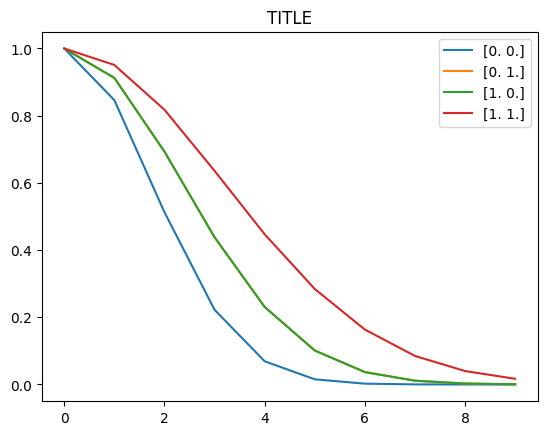

In [208]:
# plot_sv(x_mat, sv_mat, t=T, show=True)
# np.arange(T)
plot_sv(x_mat, sv_mat[x_idx], t=T, show=True)
# type(T)


In [210]:
# # get kpm
# kpm = sks.nonparametric.kaplan_meier_estimator(np.array(status, dtype="bool"), t_event)
# plt.plot(kpm[0], kpm[1])

,time,0,1
0,4.0,0.0,1.0
1,6.0,0.0,1.0
2,2.0,0.0,1.0
3,2.0,0.0,0.0
4,3.0,0.0,0.0
...,...,...,...
95,1.0,1.0,0.0
96,3.0,1.0,0.0
97,6.0,0.0,1.0
98,4.0,0.0,1.0


In [211]:
# cox model
# y = np.array(list(zip(np.array(status, dtype="bool"), t_event)), dtype=[("Status","?"),("Survival_in_days", "<f8")])
cph = sks.linear_model.CoxPHSurvivalAnalysis()
cph.fit(train.iloc[:,2:], y)
cph_surv = cph.predict_survival_function(pd.DataFrame(x_out))

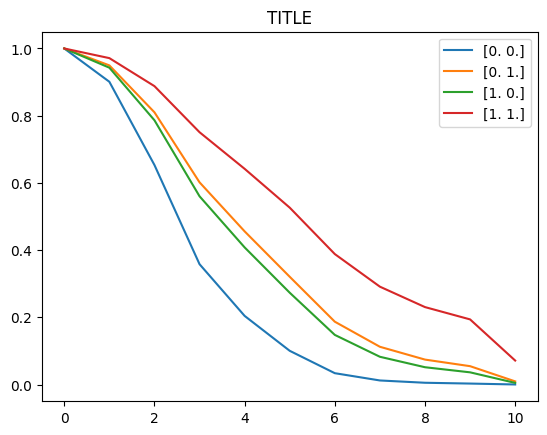

In [212]:
# get time and probs
cph_sv_t = cph_surv[0].x
cph_sv_val = [sf(cph_sv_t) for sf in cph_surv]
# add a time 0 with prob 1 
cph_sv_t = np.concatenate([np.array([0]), cph_sv_t])
cph_sv_val = [np.concatenate([np.array([1]), sv]) for sv in cph_sv_val]

plot_sv(x_mat, cph_sv_val, t=cph_sv_t, show=True)

In [218]:
# cph_surv[0].y

In [217]:
# cph_fx = [sf(np.arange(sf.x.max())) for sf in cph_surv]
# cph_fx[3]
# cph_surv

In [1036]:
# plot_sv(x_mat, cph_fx, 20, show=False)
# for idx, i in enumerate(cph_fx)
# cph_fx[1]

# def plot_sv(x_mat, sv_mat, t, title="TITLE", save=False, dir=".", show=False):
#     dist_x, dist_idx = np.unique(x_mat, axis=0, return_index=True)

#     # print(tt)
#     try:
#         fig = plt.figure()
#         if len(sv_mat) != len(dist_idx):
#             for idx, i in enumerate(sv_mat[dist_idx]):
#                 plt.step(np.arange(t), i, label = str(dist_x[idx]))
#                 plt.legend()
#                 plt.title(title)
#         else:
#             for idx, i in enumerate(sv_mat):
#                 # plt.step(i.x, i.y, label = str(dist_x[idx]))
#                 plt.step(np.arange(t), i, label = str(dist_x[idx]))
#                 plt.legend()
#                 plt.title(title)
#         if show:
#             plt.show()
#         if save:
#             plt.savefig(f"{dir}/{title}.png")
#     finally:
#         plt.close(fig)

In [219]:
# plot_sv(x_mat, cph_surv, 20, show= True)
# cph_surv[0].x.max()
# # cph_fx[0].shape
# cph_t = cph_surv[0].x.max()
# plot_sv(x_mat, cph_fx, t=cph_t, show= True)


In [220]:
# time_points = np.linspace(0,20, 100)
# for i, surv_func in enumerate(cph_surv):
#     plt.step(time_points, surv_func(time_points), where="post", label=f"Sample {str(dist_x[i])}")
# plt.ylabel("est. Surv")
# plt.xlabel("time")
# plt.legend(loc="best")


In [232]:
# try with the rsf
import sksurv.ensemble

rsf = sks.ensemble.RandomSurvivalForest(
    n_estimators=1000, min_samples_split=10, min_samples_leaf=15, n_jobs=-1, random_state=20
)
rsf.fit(pd.DataFrame(x_mat), y)

RandomSurvivalForest(min_samples_leaf=15, min_samples_split=10,
                     n_estimators=1000, n_jobs=-1, random_state=20)

In [233]:
rsf_surv1 = rsf.predict_survival_function(pd.DataFrame(x_out))

In [237]:
# get the predictions out
rsf_t = rsf_surv1[0].x
print(rsf_t)
rsf_fx = [sf(rsf_t) for sf in rsf_surv1]
print(rsf_fx)
# add a time 0 with prob 1 
rsf_t = np.concatenate([np.array([0]), rsf_t])
rsf_fx = [np.concatenate([np.array([1]), sv]) for sv in rsf_fx]

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[array([0.9039775 , 0.68110939, 0.41686436, 0.26909564, 0.15181017,
       0.05116929, 0.01731798, 0.00831509, 0.        , 0.        ]), array([0.95466259, 0.78278888, 0.56311248, 0.34867514, 0.28666042,
       0.11482426, 0.08514507, 0.05471349, 0.03362683, 0.        ]), array([0.93200793, 0.77144732, 0.4934409 , 0.40017549, 0.19575135,
       0.12307375, 0.04790123, 0.03811514, 0.03811514, 0.        ]), array([0.9718646 , 0.84115757, 0.59409649, 0.46207081, 0.31587687,
       0.19035176, 0.13053224, 0.09908593, 0.09004238, 0.        ])]


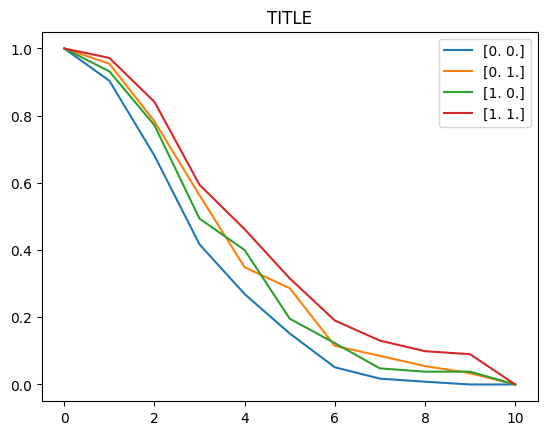

In [235]:
plot_sv(x_mat, rsf_fx, t = rsf_t, show=True)

In [230]:
# time_points = np.linspace(0,20, 100)
# for i, surv_func in enumerate(rsf_surv1):
#     plt.step(time_points, surv_func(time_points), where="post", label=f"Sample {dist_x[i]}")
# plt.ylabel("est. Surv")
# plt.xlabel("time")
# plt.legend(loc="best")

# BART

In [240]:

def surv_pre_train2(data_x_n, data_y, X_TIME=True):
    # set up times
    # t_sort = np.append([0], np.unique(data_y["Survival_in_days"]))
    t_sort = np.unique(data_y["Survival_in_days"])
    t_ind = np.arange(0,t_sort.shape[0])
    t_dict = dict(zip(t_sort, t_ind))

    # set up delta
    delta = np.array(data_y["Status"], dtype = "int")
    
    t_out = []
    pat_x_out = []
    delta_out = []
    for idx, t in enumerate(data_y["Survival_in_days"]):
        # get the pat_time and use to get the array of times for the patient
        p_t_ind = t_dict[t]
        p_t_set = t_sort[0:p_t_ind+1]
        t_out.append(p_t_set)
        
        size = p_t_set.shape[0]
        # get patient array
        pat_x = np.tile(data_x_n.iloc[idx].to_numpy(), (size, 1))
        pat_x_out.append(pat_x)

        # get delta
        pat_delta = delta[idx]
        delta_set = np.zeros(shape=size, dtype=int)
        delta_set[-1] = pat_delta
        delta_out.append(delta_set)
    
    
    t_out, delta_out, pat_x_out = np.concatenate(t_out), np.concatenate(delta_out), np.concatenate(pat_x_out)
    if X_TIME:
        pat_x_out = np.array([np.concatenate([np.array([t_out[idx]]), i]) for idx, i in enumerate(pat_x_out)])
    return t_out, delta_out, pat_x_out

# def surv_pre_test2(data_x_n, data_y, T, X_TIME=True):
#     # t_sort = np.append([0], np.unique(data_y["Survival_in_days"]))
#     t_sort = np.unique(data_y["Survival_in_days"])
#     t_out = []
#     pat_x_out = []
#     for idx, t in enumerate(data_y["Survival_in_days"]):
#         # get the pat_time and use to get the array of times for the patient
#         p_t_set = t_sort
#         t_out.append(p_t_set)
        
#         size = p_t_set.shape[0]
#         # get patient array
#         pat_x = np.tile(data_x_n.iloc[idx].to_numpy(), (size, 1))
#         pat_x_out.append(pat_x)
    
#     t_out, pat_x_out = np.concatenate(t_out),  np.concatenate(pat_x_out)
#     if X_TIME:
#         pat_x_out = np.array([np.concatenate([np.array([t_out[idx]]), i]) for idx, i in enumerate(pat_x_out)])
#     return t_out, pat_x_out



# def get_bart_test(x_out, T):
#     d1 = np.arange(T + 1)
#     d2 = np.arange(x_out.shape[1])
    
#     out = np.stack(np.array(np.meshgrid(d1, d2, d2)),-1).reshape(-1, d2.shape[0] + 1)
#     return out


In [340]:
def get_bart_test(x_out, T):
    s0 = x_out.shape[0]
    s1 = x_out.shape[1]
    # create time range
    # d1 = np.arange(T+1)
    d1 = T
    # repeating time range
    d2 = np.tile(d1,s0).reshape(d1.shape[0]*s0,1)
    # repeat x_out and shape as long by nvar
    d3 = np.tile(x_out, d1.shape[0]).reshape(s0*d1.shape[0], s1)
    # holding matrix
    d4 = np.matrix(np.zeros((d3.shape[0], d3.shape[1] + 1))) # always +1 because only adding on time col
    # replace
    d4[:,0] = d2
    d4[:,1:3] = d3
    return d4
# d_out = np.matrix()


In [241]:
train_t, train_delta, train_x = surv_pre_train2(pd.DataFrame(x_mat), y)
# test_t, test_x = surv_pre_test2(x, y)
off = sp.norm.ppf(np.mean(train_delta))

In [341]:
bart_t = np.unique(train_t).max()
# print(bart_t)
test_x = get_bart_test(x_out, np.unique(train_t))

In [373]:
with pm.Model() as bart:
    x_data = pm.MutableData("x", train_x)
    # y_data = pm.MutableData("y", delta1)
    
    f = pmb.BART("f", X = x_data, Y = train_delta, m=50)
    z = pm.Deterministic("z", f + off)

    mu = pm.Deterministic("mu", pm.math.invprobit(z))
    pm.Bernoulli("y_pred", p=(mu), observed=train_delta, shape=x_data.shape[0])
    bdata = pm.sample(random_seed=2, draws=1000, tune = 100, cores=8)

Multiprocess sampling (8 chains in 8 jobs)
PGBART: [f]


Sampling 8 chains for 100 tune and 1_000 draw iterations (800 + 8_000 draws total) took 52 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


In [251]:
bdata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

In [345]:
# test_x2 = np.unique(test_x, axis=0)
# # np.matrix(test_x2)[:,0]
# test_x.shape

(40, 3)

In [374]:
with bart:
    pm.set_data({"x":pd.DataFrame(test_x)})
    pp = pm.sample_posterior_predictive(bdata, var_names = ["y_pred", "f", "z", "mu"])

Sampling: [f, y_pred]


In [347]:
pp

Inference data with groups:
	> posterior_predictive
	> observed_data
	> constant_data

In [354]:
# get sv
def get_sv_fx(pp, x_out):
    p0 = pp.posterior_predictive["mu"].values.shape[0]
    p1 = pp.posterior_predictive["mu"].values.shape[1]
    p2 = pp.posterior_predictive["mu"].values.shape[2]
    r0 = x_out.shape[0]
    r1 = int(p2/r0)
    pp_post = pp.posterior_predictive["mu"].values.reshape(p0*p1, p2).mean(axis=0).reshape(r0, r1)
    sv = (1-pp_post).cumprod(axis=1)
    return sv

In [375]:
# shpe = pp.posterior_predictive["mu"].values.shape
# shpe0 = shpe[0] * shpe[1]
# shpe1 = shpe[2]
# shp_grps = x_out.shape[0]
# shpeT = int(shpe1/shp_grps)

# pp_post = pp.posterior_predictive["mu"].values.reshape((shpe0,shpe1))
# pp_postm = pp_post.mean(axis=0).reshape(shpeT, 4).T
# sv = (1-pp_postm).cumprod(axis=1)
# sv

sv_fx = get_sv_fx(pp, x_out)
sv_fx

array([[8.50165767e-01, 5.88627005e-01, 3.11698344e-01, 1.55520031e-01,
        6.64440055e-02, 2.32525089e-02, 7.86725879e-03, 2.63407385e-03,
        8.57367022e-04, 2.67923471e-04],
       [9.37404262e-01, 7.83650492e-01, 5.57493318e-01, 3.79596505e-01,
        2.38609417e-01, 1.29564663e-01, 6.87297489e-02, 3.60439603e-02,
        1.84385903e-02, 9.11743284e-03],
       [9.19074716e-01, 7.48889714e-01, 5.04571680e-01, 3.32870814e-01,
        1.91701594e-01, 9.69739013e-02, 4.73869624e-02, 2.29009383e-02,
        1.07985622e-02, 4.92461920e-03],
       [9.67954478e-01, 8.79406545e-01, 7.16722834e-01, 5.74831570e-01,
        4.30265329e-01, 2.94244111e-01, 1.96832592e-01, 1.30341679e-01,
        8.45783305e-02, 5.34254521e-02]])

In [376]:
# x_mat
# get the predictions out
sv_t = np.unique(train_t)
# print(rsf_t)
# print(sv)

# add a time 0 with prob 1 
sv_t = np.concatenate([np.array([0]), sv_t])
sv_fx2 = [np.concatenate([np.array([1]), sv]) for sv in sv_fx]
print(sv_t)
print(sv_fx2)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[array([1.00000000e+00, 8.50165767e-01, 5.88627005e-01, 3.11698344e-01,
       1.55520031e-01, 6.64440055e-02, 2.32525089e-02, 7.86725879e-03,
       2.63407385e-03, 8.57367022e-04, 2.67923471e-04]), array([1.        , 0.93740426, 0.78365049, 0.55749332, 0.3795965 ,
       0.23860942, 0.12956466, 0.06872975, 0.03604396, 0.01843859,
       0.00911743]), array([1.        , 0.91907472, 0.74888971, 0.50457168, 0.33287081,
       0.19170159, 0.0969739 , 0.04738696, 0.02290094, 0.01079856,
       0.00492462]), array([1.        , 0.96795448, 0.87940654, 0.71672283, 0.57483157,
       0.43026533, 0.29424411, 0.19683259, 0.13034168, 0.08457833,
       0.05342545])]


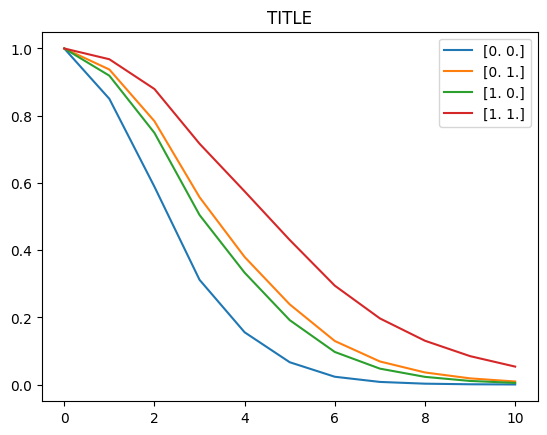

In [377]:
plot_sv(x_mat, sv_fx2, t = sv_t, show=True)

In [371]:
# pp_post = pp.posterior_predictive["mu"].values.reshape((800,64))
# pp_postm = pp_post.mean(axis=0).reshape(36,4).T
# sv = (1-pp_postm).cumprod(axis=1)

In [372]:
# for i in sv:
# test_str = test_x2[:,[1,2]][0:4]

# fig = plt.figure()
# for idx, i in enumerate(sv):
#     plt.step(np.arange(i.shape[0]), i, label = str(test_str[idx]))
#     plt.legend()
# plt.show()
# plt.close(fig)

# Metrics

In [390]:
def get_metrics(f_t, f, T, quants = np.array([0.1, 0.25, 0.5, 0.75, 0.9])):
    # t_quant = np.array(np.ceil(np.quantile(np.arange(T), quants)), dtype="int")
    t_quant = np.array(np.ceil(np.quantile(T, quants)), dtype="int")
    # print(t_quant)
    
    # f_t = np.matrix(rsf_fx)[:,t_quant]
    f_t = np.matrix(f_t)[:,t_quant]
    f = np.matrix(f)[:, t_quant]
    # f = np.matrix(sv_mat[dist_idx])[:, t_quant]

    rmse = np.round(np.sqrt(np.mean(np.power(f_t - f, 2), axis=0)), 4)
    bias = np.round(np.mean(f_t - f, axis = 0), 4)
    
    return rmse, bias, t_quant

In [394]:
# cph_fx
cph_sv_val

[array([1.00000000e+00, 9.00900361e-01, 6.53178448e-01, 3.58032679e-01,
        2.04164369e-01, 1.00265604e-01, 3.36799254e-02, 1.20154244e-02,
        5.19384197e-03, 2.79186019e-03, 7.75745942e-05]),
 array([1.        , 0.94969268, 0.8100552 , 0.60168588, 0.45573835,
        0.32060407, 0.18691178, 0.11226323, 0.07414452, 0.05454276,
        0.00926941]),
 array([1.        , 0.94281476, 0.78637875, 0.56014568, 0.40799645,
        0.27314942, 0.14759429, 0.08250748, 0.05140024, 0.03621148,
        0.00479485]),
 array([1.        , 0.97129525, 0.88793136, 0.75077445, 0.64184529,
        0.52631187, 0.38816931, 0.2911366 , 0.23037875, 0.1937333 ,
        0.0712705 ])]

In [395]:
rsf_rmse, rsf_bias, t_quant = get_metrics( f_t = rsf_fx, f = sv_mat[x_idx], T = rsf_t)

cph_rmse, cph_bias, t_quant = get_metrics( f_t = cph_sv_val, f = sv_mat[x_idx], T = cph_sv_t)

bart_rmse, bart_bias, t_quant = get_metrics(f_t = sv_fx2, f = sv_mat[x_idx], T = sv_t)
print(rsf_rmse)
print(rsf_bias)
print(cph_rmse)
print(cph_bias)
print(bart_rmse)
print(bart_bias)

[[0.0386 0.1207 0.1256 0.0433 0.0443]]
[[0.0352 0.0833 0.1121 0.0387 0.0359]]
[[0.0379 0.1354 0.1895 0.1046 0.0941]]
[[0.0357 0.1341 0.1797 0.0789 0.0673]]
[[0.0156 0.0911 0.113  0.0492 0.0353]]
[[0.0132 0.089  0.1064 0.0366 0.0241]]


In [410]:
# print(sv_mat[x_idx])
# print(sv_fx2)

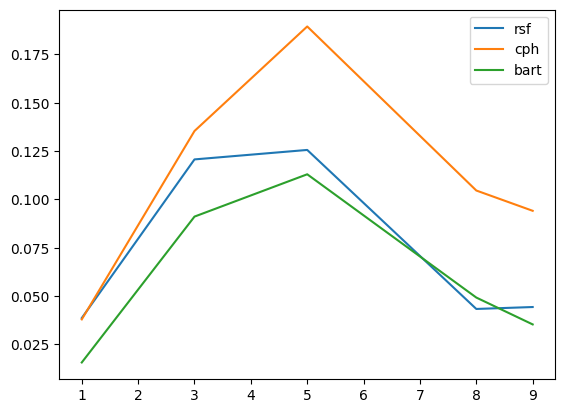

In [403]:
fig = plt.figure()
plt.plot(t_quant, rsf_rmse[0], label="rsf")
plt.plot(t_quant, cph_rmse[0], label = "cph")
plt.plot(t_quant, bart_rmse[0], label = "bart")
plt.legend()
plt.show()
plt.close(fig)

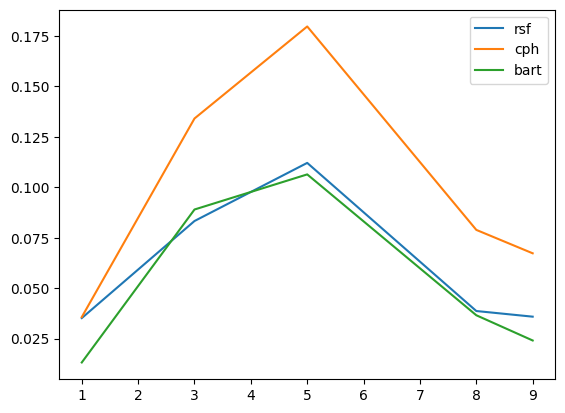

In [411]:
fig = plt.figure()
plt.plot(t_quant, rsf_bias[0], label="rsf")
plt.plot(t_quant, cph_bias[0], label = "cph")
plt.plot(t_quant, bart_bias[0], label = "bart")
plt.legend()
plt.show()
plt.close(fig)